<a href="https://colab.research.google.com/github/gbiamgaurav/Feature-Engineering/blob/main/Transformation_%26_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Transformation :-  

Algorithms where transformation is required :--- 

`Linear Regression` -- Gradient Descent -- Global Minima

`KNN, K Means, Hierarichal Clustering` -- Eucledian Distance

* Every point has some vectors and directions
* Scale down the value between 0 to 1 

`Deep Learning Techniques` (Stardardization, Scaling):-  

`ANN, CNN, RNN`


In [1]:
url = "https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv"

Types of Transformation :-- 

* Normalization & Standardization
* Scaling to Minimum and Maximum values
* Scaling to Median and Quantiles
* Guassian Transformation
* Logarithmic Transaformation
* Reciprocal Transformation
* Square Root Transformation
* Exponential Transformation
* Box Cox Transformation

`Normalization & Standardization`

We try to bring all the variables or features to a similar scale, Standardization means centering the variable at zero.

Mean = 0

std = 1

z = (x-x_mean)/std

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(url, usecols=['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [5]:
### Replace the Null values in Age with median values

df['Age'].fillna(df.Age.median(), inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [8]:
### Standardization: we use the standard scaler from sklearn library

from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

### fit vs fit_transform
df_scaled = scaler.fit_transform(df)

In [11]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [12]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

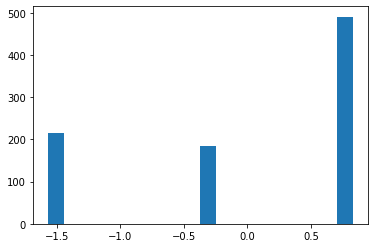

In [15]:
plt.hist(df_scaled[:,1], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

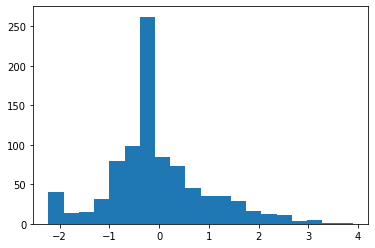

In [16]:
plt.hist(df_scaled[:,2], bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

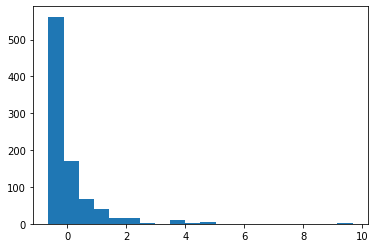

In [17]:
plt.hist(df_scaled[:,3], bins=20)

#### `Min Max Scaling` (Works well with CNN -- Deep Learning Techniques)

Min Max Scaling scales the values between 0 and 1.

X_scaled = (X - X.min / (X.max - X.min)

In [21]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

df_minmax = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)

In [22]:
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

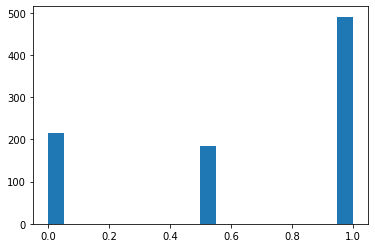

In [23]:
plt.hist(df_minmax['Pclass'], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

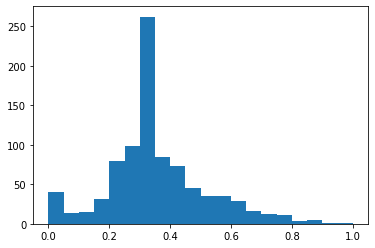

In [24]:
plt.hist(df_minmax['Age'], bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

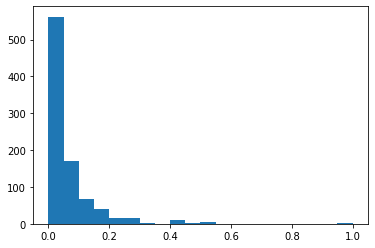

In [25]:
plt.hist(df_minmax['Fare'], bins=20)

### `Robust Scaler`

It is used to scale the feature to median and quantiles.

IQR = 7th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9 -- 90% percentile -- 90% of all values in this group is less than 9
1 -- 10% percentile -- 10% of all values in this group is less than 1 
4 -- 40% percentile


In [27]:
from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler()

df_robust_scaler = pd.DataFrame(rb_scaler.fit_transform(df), columns=df.columns)

In [28]:
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <a list of 20 Patch objects>)

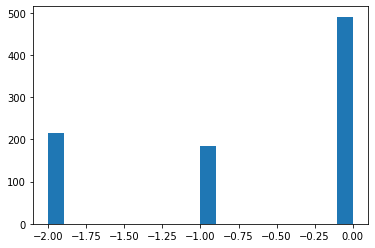

In [35]:
plt.hist(df_robust_scaler['Pclass'], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

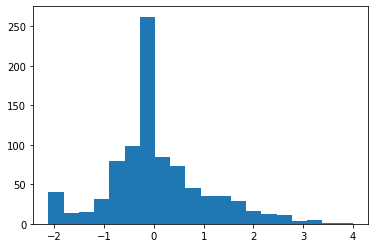

In [34]:
plt.hist(df_robust_scaler['Age'], bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <a list of 20 Patch objects>)

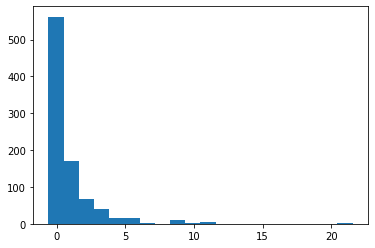

In [33]:
plt.hist(df_robust_scaler['Fare'], bins=20)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

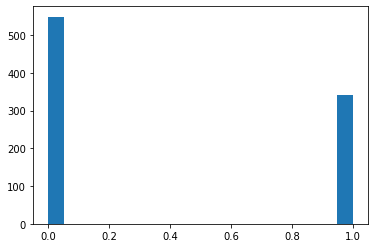

In [32]:
plt.hist(df_robust_scaler['Survived'], bins=20)

### `Guassian Transformation aka Normal Distribution`

Some ML Algorithms like linear & Logistic assume that the features are normally distributed, they will give us good Accuracy and Performance

When data is not normally distributed we can apply the following techniques :--   

* Logarithmic Transformation
* Reciprocal Transformation
* Square Root Transformation
* Exponential Transformation
* Box Cox Transformation

In [37]:
df = pd.read_csv(url, usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [38]:
### Fillnan

df['Age'] = df['Age'].fillna(df.Age.median())

In [39]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [40]:
## If you want to check whether feature is normally distributed or Gaussian Distributed

## We use Q-Q plot

In [42]:
import scipy.stats as stat
import pylab

In [46]:
def plot_data(df,feature):
  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  df[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(df[feature], dist='norm', plot=pylab)
  plt.show();

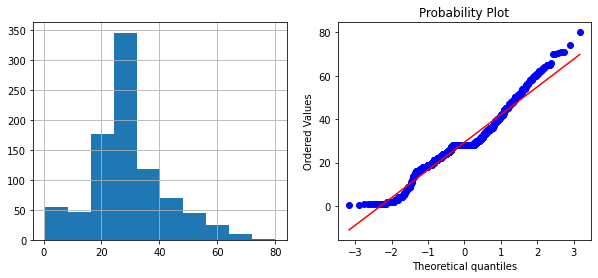

In [47]:
plot_data(df, 'Age')

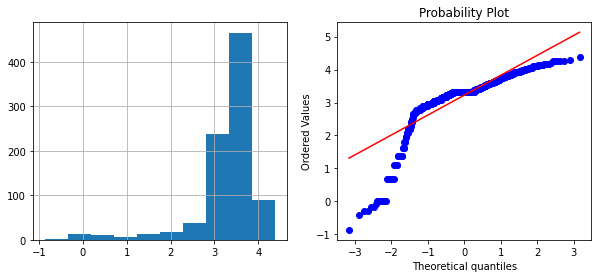

In [49]:
## Logarithmic Transformation

df['Age_log'] = np.log(df['Age'])
plot_data(df, 'Age_log')

In [51]:
np.log(df['Fare'])

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

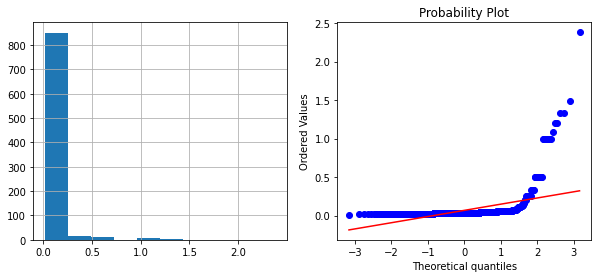

In [52]:
## Reciprocal Transformation

df['Age_rec'] = 1/df['Age']
plot_data(df, 'Age_rec')

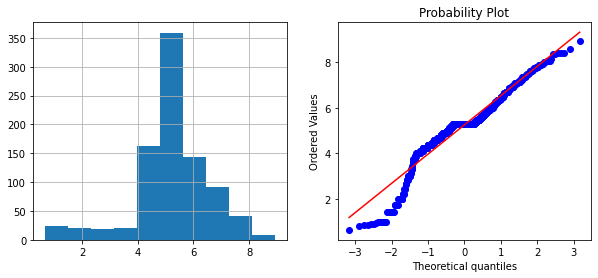

In [53]:
## Square Root Transformation

df['Age_sqr'] = df.Age**(1/2)
plot_data(df, 'Age_sqr')

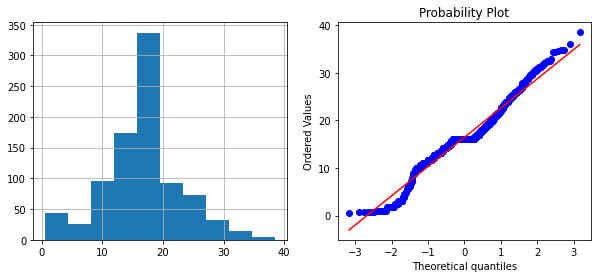

In [54]:
## Exponential Transformation

df['Age_exp'] = df.Age**(1/1.2)
plot_data(df, 'Age_exp')

### `The Box-Cox transformation` is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [58]:
## Box-cox Transformation

df['Age_boxcox'], parameters = stat.boxcox(df['Age'])

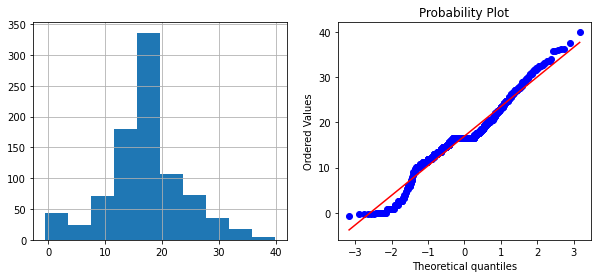

In [59]:
plot_data(df, 'Age_boxcox')

In [61]:
print(parameters)

0.7964531473656952


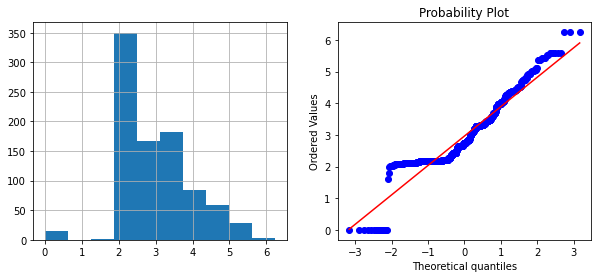

In [65]:
df['Fare_log'] = np.log1p(df['Fare'])
plot_data(df, 'Fare_log')

In [68]:
df['Fare_boxcox'], parameters = stat.boxcox(df['Fare'])
plot_data(df, 'Fare_boxcox')

ValueError: ignored

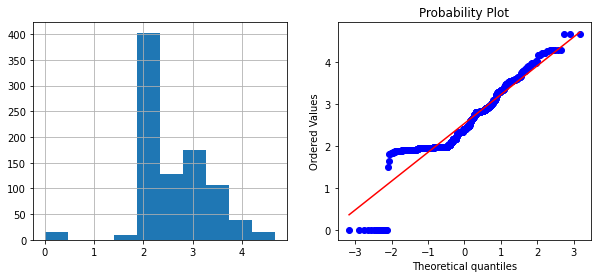

In [69]:
df['Fare_boxcox'], parameters = stat.boxcox(df['Fare']+1)
plot_data(df, 'Fare_boxcox')